In [2]:
# Step 1: Import required libraries
import pandas as pd
from textblob import TextBlob

# Step 2: Load the dataset
data = pd.read_csv('intern.csv')

# Step 3: Handle missing values (if any) - here we fill missing values with empty strings
data['ProductName'] = data['ProductName'].fillna('')
data['Category'] = data['Category'].fillna('')

# Step 4: Define a function to calculate sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Step 5: Apply the sentiment function to the ProductName and Category columns
data['ProductName_Sentiment'] = data['ProductName'].apply(get_sentiment)
data['Category_Sentiment'] = data['Category'].apply(get_sentiment)

# Step 6: Display the updated dataframe
print(data[['ProductID', 'ProductName', 'ProductName_Sentiment', 'Category', 'Category_Sentiment']])

# Optional Step 7: Save the updated dataset to a new CSV file
data.to_csv('updated_intern.csv', index=False)


     ProductID       ProductName  ProductName_Sentiment     Category  \
0            1        Headphones                    0.0  Electronics   
1            2        Headphones                    0.0  Electronics   
2            3        Smartwatch                    0.0  Electronics   
3            4        Smartphone                    0.0  Electronics   
4            5            Laptop                    0.0  Electronics   
..         ...               ...                    ...          ...   
995        996     Throw Blanket                    0.0     Blankets   
996        997    Fleece Blanket                    0.0     Blankets   
997        998     Throw Blanket                    0.0     Blankets   
998        999  Weighted Blanket                    0.0     Blankets   
999       1000     Throw Blanket                    0.0     Blankets   

     Category_Sentiment  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4    

In [19]:
# Step 1: Import required libraries for plotting
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset
data = pd.read_csv('intern.csv')

# Handle missing values (if any)
data['ProductName'] = data['ProductName'].fillna('')
data['Category'] = data['Category'].fillna('')

# Define a function to calculate sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply the sentiment function to the ProductName and Category columns
data['ProductName_Sentiment'] = data['ProductName'].apply(get_sentiment)
data['Category_Sentiment'] = data['Category'].apply(get_sentiment)



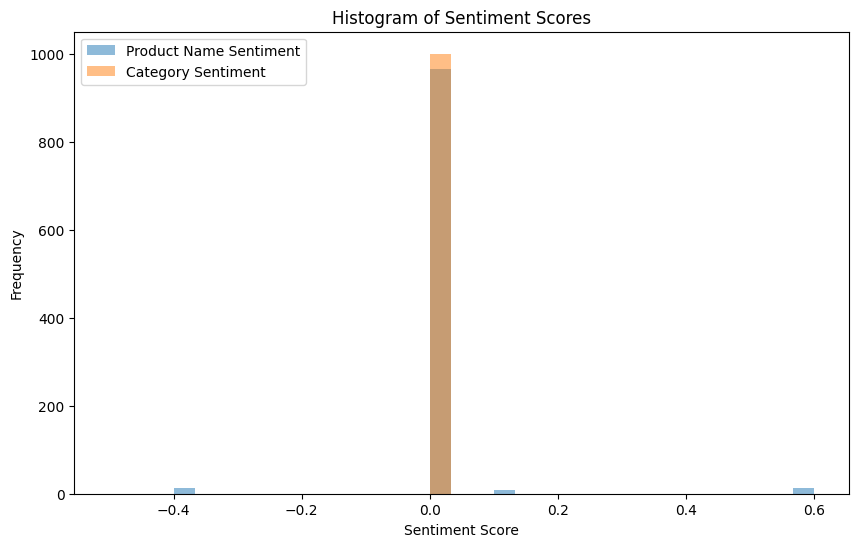

In [5]:
# Step 2: Histogram of Sentiment Scores
plt.figure(figsize=(10, 6))
plt.hist(data['ProductName_Sentiment'], bins=30, alpha=0.5, label='Product Name Sentiment')
plt.hist(data['Category_Sentiment'], bins=30, alpha=0.5, label='Category Sentiment')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment Scores')
plt.legend(loc='upper left')
plt.show()

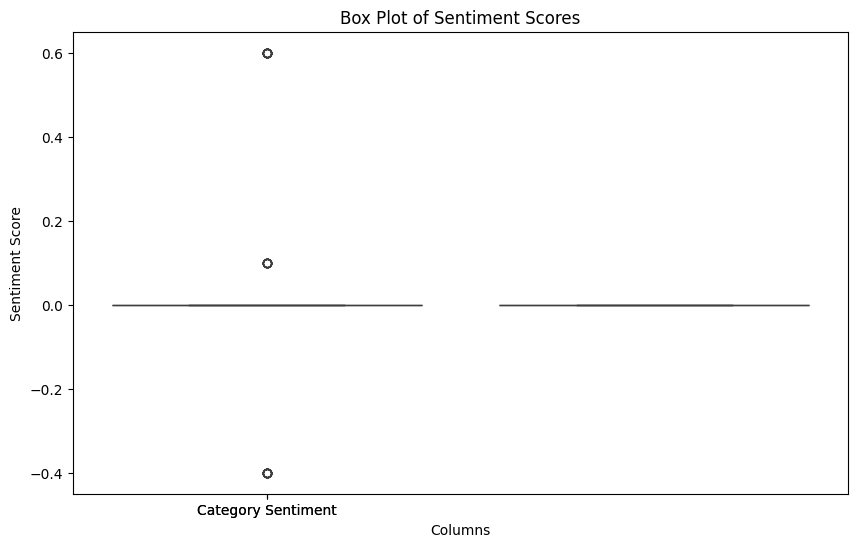

In [14]:
# Step 3: Box Plot of Sentiment Scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=[data['ProductName_Sentiment'], data['Category_Sentiment']], )
plt.xticks([0, 0], ['Product Name Sentiment', 'Category Sentiment'])
plt.xlabel('Columns')
plt.ylabel('Sentiment Score')
plt.title('Box Plot of Sentiment Scores')
plt.show()

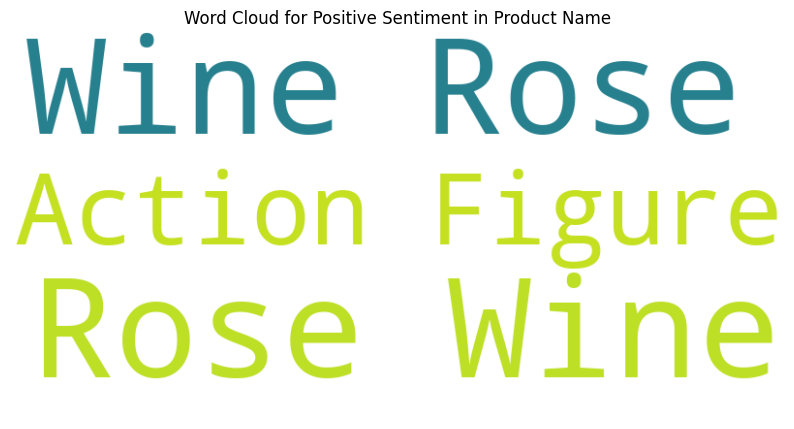

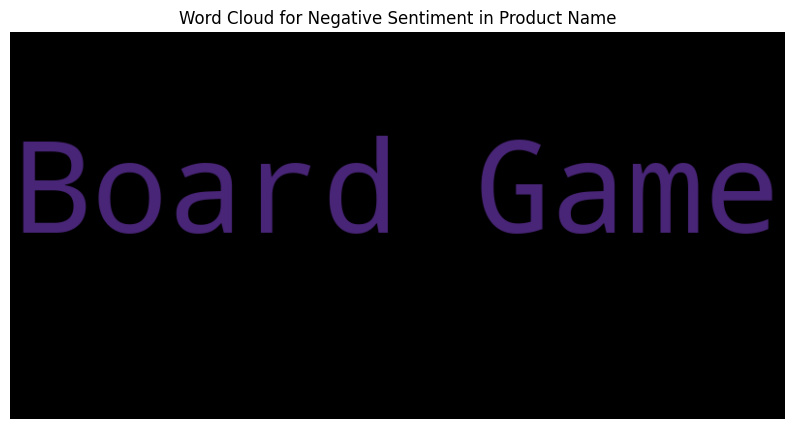

In [15]:
# Step 4: Word Cloud
positive_words = ' '.join(data[data['ProductName_Sentiment'] > 0]['ProductName'])
negative_words = ' '.join(data[data['ProductName_Sentiment'] < 0]['ProductName'])

positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_words)
negative_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_words)

plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment in Product Name')
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiment in Product Name')
plt.show()


C:\Users\pavan\AppData\Local\Temp\ipykernel_46104\1829343885.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='ProductName_Sentiment', data=average_sentiment_by_category, palette='viridis')


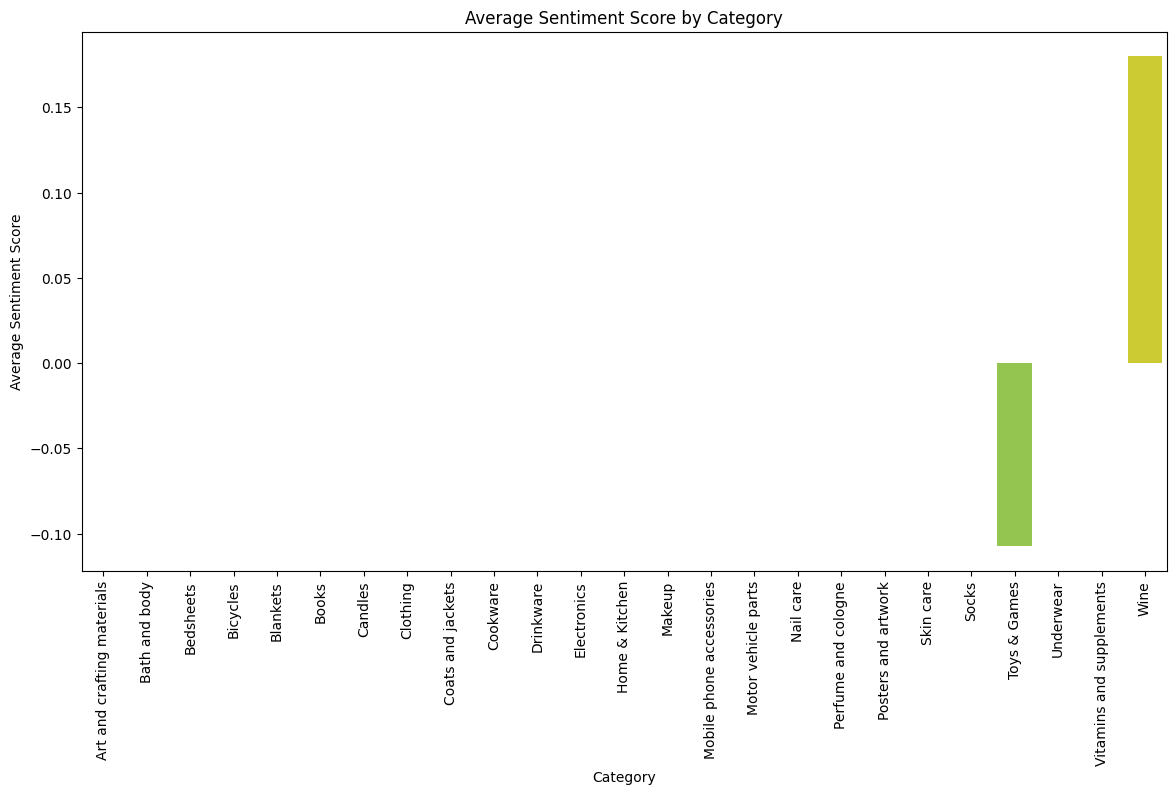

In [16]:
# Step 5: Bar Plot of Average Sentiment by Category
average_sentiment_by_category = data.groupby('Category')['ProductName_Sentiment'].mean().reset_index()
plt.figure(figsize=(14, 7))
sns.barplot(x='Category', y='ProductName_Sentiment', data=average_sentiment_by_category, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score by Category')
plt.show()


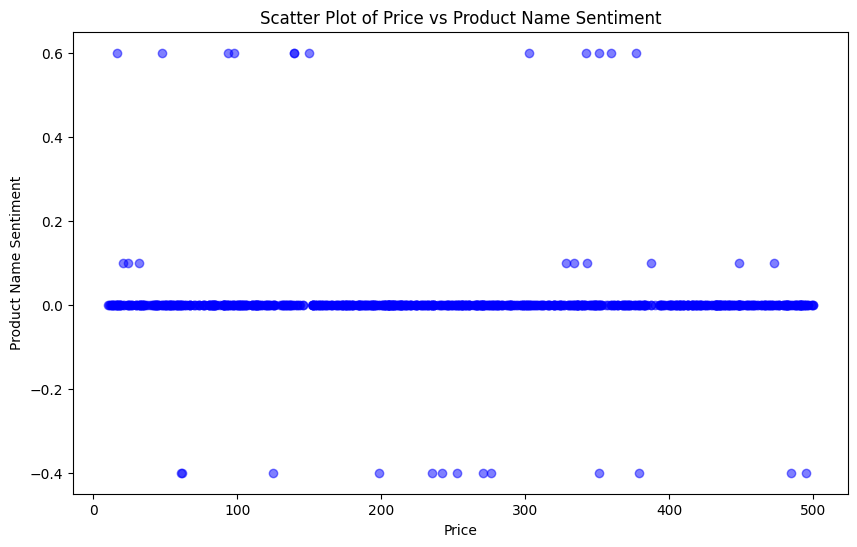

In [17]:
# Step 6: Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Price'], data['ProductName_Sentiment'], alpha=0.5, c='blue')
plt.xlabel('Price')
plt.ylabel('Product Name Sentiment')
plt.title('Scatter Plot of Price vs Product Name Sentiment')
plt.show()
